In [1]:
from keras.datasets import reuters

(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000) # training set과 test set으로 나눔
#가장 자주 등장하는 단어 1만개

Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): #이거도 원핫 인코딩에 해당
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # x_train 에 해당하는 부분을 원핫인코딩
x_test = vectorize_sequences(test_data) #x_test 에 해당하는 부분을 원핫 인코딩

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)# 원핫 인코딩으로 만들어줌 y_train 해당
one_hot_test_labels = to_categorical(test_labels) # y_test 해당

In [4]:
from keras import models
from keras import layers

model = models.Sequential()# 모델 층 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))#총 10000개의 특징이 들어 갈 예정(데이터의 갯수가 아님)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0904 10:14:26.822494 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:67: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 10:14:26.844432 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:548: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 10:14:26.852423 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:4439: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              #두 확률 분포 사이의 거리를 측정 (네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이 거리)
             metrics=['accuracy'])

W0904 10:14:26.935189 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 10:14:26.980098 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:3583: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
x_val = x_train[:1000] #검증을 위해 데이터셋을 검증용 데이터와 훈련용 데이터로 나눔
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
history = model.fit(partial_x_train, #훈련용 데이터로 모델에 적용
                   partial_y_train,
                   epochs=20, #20회 반복
                   batch_size=512, #한번 들어가는 데이터 셋 크기가 512개씩
                   validation_data=(x_val,y_val)) #검증은 검증용 데이터를 사용하여 함

W0904 10:14:27.223460 12492 deprecation.py:323] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 10:14:27.320596 12492 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:1040: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 701us/step - loss: 2.7431 - acc: 0.4986 - val_loss: 1.7651 - val_acc: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.4218 - acc: 0.7085 - val_loss: 1.2863 - val_acc: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.0330 - acc: 0.7806 - val_loss: 1.1233 - val_acc: 0.7620
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.8185 - acc: 0.8294 - val_loss: 1.0160 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.6629 - acc: 0.8631 - val_loss: 0.9587 - val_acc: 0.7980
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5302 - acc: 0.8925 - val_loss: 0.9200 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4351 - acc: 0.9144 - val_loss: 0.9073 - val_acc: 0.8080


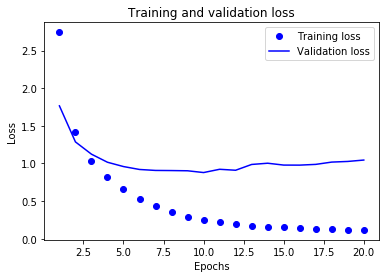

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') #훈련용 loss 값
plt.plot(epochs, val_loss, 'b', label='Validation loss') #검증용 loss 값

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

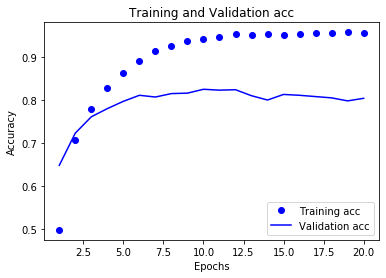

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# 9epochs 쯤에서 과대적합이 진행되는 것을 볼 수 있음

In [16]:
model = models.Sequential()# 모델 층 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))#총 10000개의 특징이 들어 갈 예정(데이터의 갯수가 아님)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              #두 확률 분포 사이의 거리를 측정 (네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이 거리)
             metrics=['accuracy'])

model.fit(partial_x_train, #훈련용 데이터로 모델에 적용
        partial_y_train,
        epochs=9, #9회 반복 , 20회는 너무 과함
        batch_size=512, #한번 들어가는 데이터 셋 크기가 512개씩
        validation_data=(x_val,y_val)) #검증은 검증용 데이터를 사용하여 함

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 212us/step - loss: 2.5960 - acc: 0.4861 - val_loss: 1.7372 - val_acc: 0.6600
Epoch 2/9
7982/7982 [==============================] - 1s 171us/step - loss: 1.4319 - acc: 0.6997 - val_loss: 1.3088 - val_acc: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.0833 - acc: 0.7608 - val_loss: 1.1293 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.8639 - acc: 0.8106 - val_loss: 1.0333 - val_acc: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.6888 - acc: 0.8488 - val_loss: 0.9830 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.5562 - acc: 0.8849 - val_loss: 0.9174 - val_acc: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.4455 - acc: 0.9083 - val_loss: 0.8969 - val_acc: 0.8140
Epoch 8

In [17]:
results

[1.040987428340759, 0.7689225289934146]

In [18]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)==np.array(test_labels_copy)
print(hits_array)
float(np.sum(hits_array)) / len(test_labels)#섞어서 그대로인 부분의 확률

[False False False ... False False False]


0.18388245770258238

In [21]:
predictions = model.predict(x_test)

In [27]:
print(np.argmax(predictions[0]))
print(predictions.shape)# 2246개의 뉴스기사에 대한 46개(데이터갯수)의 토픽(클래스)에 대한 확률 분포
print(np.sum(predictions[0]))
print(np.sum(predictions[1]))
print(predictions[0])

3
(2246, 46)
0.9999999
1.0000001
[4.3419291e-06 6.6993257e-06 2.3398679e-08 9.8428702e-01 1.4351179e-02
 1.2157368e-06 6.7509613e-06 8.7570124e-06 2.5329026e-04 4.4363300e-05
 2.6466355e-06 2.0623817e-04 1.2333207e-05 7.4814066e-05 2.9434711e-06
 5.7334648e-07 5.5965003e-05 3.1047311e-05 3.4872399e-05 2.7974083e-05
 2.0207527e-04 5.9975273e-06 6.0269036e-07 3.0289577e-05 1.5604417e-06
 3.1642203e-06 3.7980094e-08 4.3392465e-06 3.6777129e-07 9.4910365e-06
 1.6577023e-05 6.6832609e-07 3.4401182e-06 6.0988128e-07 4.7451744e-05
 1.5474430e-05 1.2308093e-04 2.7168560e-06 4.6934598e-08 6.7531997e-05
 2.5792142e-06 1.1498823e-06 4.9153670e-07 4.6144170e-05 8.9642475e-07
 7.1441235e-08]


In [28]:
model = models.Sequential()# 모델 층 생성
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))#총 10000개의 특징이 들어 갈 예정(데이터의 갯수가 아님)
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              #두 확률 분포 사이의 거리를 측정 (네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이 거리)
             metrics=['accuracy'])

model.fit(partial_x_train, #훈련용 데이터로 모델에 적용
        partial_y_train,
        epochs=20, #9회 반복 , 20회는 너무 과함
        batch_size=512, #한번 들어가는 데이터 셋 크기가 512개씩
        validation_data=(x_val,y_val)) #검증은 검증용 데이터를 사용하여 함

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 334us/step - loss: 3.5757 - acc: 0.0197 - val_loss: 3.3554 - val_acc: 0.0380
Epoch 2/20
7982/7982 [==============================] - 1s 174us/step - loss: 3.1989 - acc: 0.0948 - val_loss: 3.0495 - val_acc: 0.1730
Epoch 3/20
7982/7982 [==============================] - 1s 170us/step - loss: 2.8575 - acc: 0.2379 - val_loss: 2.7202 - val_acc: 0.4770
Epoch 4/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.4784 - acc: 0.5307 - val_loss: 2.3585 - val_acc: 0.5380
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.1036 - acc: 0.5599 - val_loss: 2.0493 - val_acc: 0.5600
Epoch 6/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.8150 - acc: 0.5717 - val_loss: 1.8461 - val_acc: 0.5590
Epoch 7/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.6280 - acc: 0.5732 - val_loss: 1.7283 - val_acc: 0.5600


In [29]:
results

[1.60132905296842, 0.6331255565449688]

In [ ]:
#은닉층에서 출력층의 노드가 48인데 은닉층을 4로 하여 손실이 많이 일어남 이로써 정확도가 떨어지는걸 볼 수 있음
#즉 은닉층의 노드 수는 출력층보다 많은 것이 기본적이론( 너무적어도 안된다는 말)
#병목현상이 일어나지 않게 하기위함